#  PySOQCS Example 4: HOM Visibility simulation of a 2x2 MMI beamsplitter.

   Example of a HOM visibility calculation using a physical beamsplitter and physical detectors. Losses in in the photon propagation are also considered.<br>


## Description:

<p style='text-align: justify;'> We simulate a circuit made of a 2x2 MMI beamsplitter with two photons of Gaussian shape in each of the input channels. We consider the time, frequency and width given in random adimensional units. At  the output we print the probability of having two photons in two different channels depending on the delay time between them. For delay dt=0 both photons are indistinguishable and the probability at the output is zero in ideal conditions. We consider time dependent losses in one of the channels and physical detectors that consider effects of efficiency, detector dead time, and dark counts. Furthermore we also include the effect of the presence of a white Gaussian noise over the output. This is a Python version of <b>live4.cpp</b> that can be found in the same folder.</p>

## Code:

Import SOQCS and some extra libraries needed to print the results.

In [1]:
import pysoqcs as soqcs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

## SOQCS Circuit

<p style='text-align: justify;'> Function that contains the SOQCS calculation of the HOM visibility of a MMI beamspliter for a delay dt between the input photons. <br>
<br>
<b>Note: </b> This is not the most
efficient implementation.  All the objects have to be recreated for each point calculation. This code is implemented for demonstration purposes therefore it is intended to be simple. </p>

In [2]:
def HOMP(dt,args):
    #Build the circuit
    example = soqcs.qodev(nph=2,nch=2,nm=1,ns=2,clock=0,R=10000,loss=True);
    example.add_photons(1,0,0, 0.0, 1.0,1.0)
    example.add_photons(1,1,0,  dt, 1.0,1.0)
    
    example.loss(1, 0.3*(args[0]+dt)/(2*args[0]))
    example.MMI2(0,1)
    example.detector(0,-1,-1,-1,-1,0.85,0.1,0.4);
    example.detector(1,-1,-1,-1,-1,0.85,0.1,0.4);
    example.noise(0.0001)
    

    # Create a simulator and run the simulation
    sim=soqcs.simulator()
    measured=sim.run(example)
    
    # Return the probability
    term=[[0,1],
          [1,1]]
    prob=measured.prob(term,example)    
    
    return prob

## Main program: Plotter

This is the main program where the HOM Visibility probability is plotted.

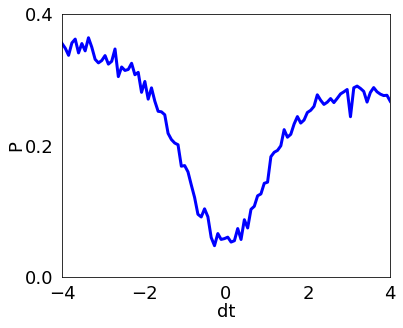

In [3]:
# Print on screen
dtm=4
soqcs.plot(HOMP, 6, 5,'dt',-dtm, dtm, 5 , 'P',0.0 , 0.4, 3, 100, [{0:dtm}])

<b> THIS CODE IS PART OF SOQCS </p>
<b>Copyright:</b>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>